In [145]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn import utils

from sklearn.tree import export_graphviz

In [146]:
df = pd.read_csv('covid2.csv', engine = "python")
df.head(10)

,covid,name,10Percentile,90Percentile,Energy,Entropy,InterquartileRange,Kurtosis,Maximum,MeanAbsoluteDeviation,...,DependenceNonUniformityNormalized,DependenceVariance,HighGrayLevelEmphasis,LargeDependenceEmphasis,LargeDependenceHighGrayLevelEmphasis,LargeDependenceLowGrayLevelEmphasis,LowGrayLevelEmphasis,SmallDependenceEmphasis,SmallDependenceHighGrayLevelEmphasis,SmallDependenceLowGrayLevelEmphasis
0,1,GIL_001_CXR_1.dcm,1328.0,2770,5.720000e+12,6.348755,792,2.419679,3430,442.901181,...,0.192829,2.656423,2772.151886,13.283849,43383.05024,0.011396,0.000935,0.219005,527.161067,0.000217
1,1,GIL_002_CXR_1.dcm,1570.0,2931,6.490000e+12,6.318717,730,2.371589,3556,412.607012,...,0.206549,2.379449,3124.537215,11.057511,40291.55820,0.006820,0.000701,0.273428,754.856925,0.000207
2,1,GIL_003_CXR_1.dcm,1460.0,2745,4.830000e+12,6.221747,708,2.379059,3389,392.069934,...,0.211251,2.294087,2730.774018,10.583610,33909.22936,0.007223,0.000773,0.284489,689.718058,0.000236
3,1,GIL_004_CXR_1.dcm,1383.0,2634,7.810000e+12,6.267669,672,2.987111,3572,394.197473,...,0.215526,2.208404,3183.664392,10.091700,35409.05351,0.005484,0.000577,0.298387,901.763716,0.000177
4,1,GIL_005_CXR_1.dcm,1415.0,2782,1.040000e+13,6.246511,683,2.989120,3679,415.331056,...,0.202341,2.470503,2448.626843,11.655721,32923.65975,0.010576,0.000962,0.258304,579.555240,0.000253
5,1,GIL_006_CXR_1.dcm,1461.0,2724,5.720000e+12,6.217048,644,2.781698,3482,383.132056,...,0.195236,2.591828,2531.685084,12.722733,37722.61712,0.010007,0.000873,0.231928,514.762286,0.000218
6,1,GIL_007_CXR_1.dcm,1368.0,2713,7.470000e+12,6.279220,730,2.327203,3362,410.448307,...,0.204770,2.412098,3072.348517,11.272562,40439.51358,0.006572,0.000659,0.267904,723.984072,0.000192
7,1,GIL_008_CXR_1.dcm,1302.0,2818,7.330000e+12,6.389404,843,2.336402,3510,466.100813,...,0.203679,2.551233,3161.051158,11.214237,44397.85366,0.007261,0.000758,0.283159,763.568889,0.000232
8,1,GIL_009_CXR_1.dcm,1630.0,2559,5.740000e+12,5.815118,487,2.731104,3187,285.156826,...,0.188887,2.666617,2021.871353,13.973909,30526.99495,0.011082,0.000834,0.202093,385.048412,0.000175
9,1,GIL_010_CXR_1.dcm,1403.0,2772,7.210000e+12,6.295720,724,2.695692,3618,419.777245,...,0.202395,2.441640,2605.753526,11.633596,33605.23583,0.010392,0.000920,0.257179,627.095349,0.000236


In [147]:
df.drop(["name", "Energy"], inplace = True, axis = 1)

In [148]:
data_y = df['covid']
data_x = df.drop(['covid'], axis = 1) 

In [149]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y)

In [150]:
train_x

,10Percentile,90Percentile,Entropy,InterquartileRange,Kurtosis,Maximum,MeanAbsoluteDeviation,Mean,Median,Minimum,...,DependenceNonUniformityNormalized,DependenceVariance,HighGrayLevelEmphasis,LargeDependenceEmphasis,LargeDependenceHighGrayLevelEmphasis,LargeDependenceLowGrayLevelEmphasis,LowGrayLevelEmphasis,SmallDependenceEmphasis,SmallDependenceHighGrayLevelEmphasis,SmallDependenceLowGrayLevelEmphasis
230,1701.0,2980,6.232987,817,1.985897,3534,419.269200,2336.541195,2321,1072,...,0.198672,2.496471,3081.064636,12.013659,41415.59480,0.007385,0.000685,0.248962,697.014376,0.000185
32,1365.0,2626,6.234778,730,2.300796,3326,395.236226,1962.398006,1918,720,...,0.302541,0.999841,2963.124621,5.114974,15402.54691,0.003431,0.000669,0.473586,1390.832128,0.000316
77,1412.0,3036,6.512579,948,2.164261,3675,511.698826,2147.569513,2056,825,...,0.196643,2.581586,3436.017175,12.499766,51314.11017,0.008996,0.000807,0.237772,707.471135,0.000205
180,1408.0,2655,6.227142,727,2.317780,3564,394.929959,1994.209299,1942,737,...,0.203248,2.401435,2986.655631,11.397037,37060.36662,0.006847,0.000647,0.263663,735.651996,0.000179
14,1353.0,2614,6.228963,679,2.732345,3503,388.574579,1933.777584,1882,818,...,0.188752,2.677153,2471.434096,13.815617,35175.12777,0.012795,0.000914,0.207963,501.950475,0.000185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1710.0,2684,5.890672,519,2.659024,3325,299.960491,2176.208027,2145,1155,...,0.211116,2.254110,1947.050111,10.740947,23288.83174,0.009388,0.000948,0.273528,491.743926,0.000275
237,1460.0,2494,5.984055,581,2.569246,3237,324.103712,1957.094521,1925,906,...,0.213730,2.172412,2081.351211,10.513353,23750.81551,0.009344,0.000933,0.275317,535.482505,0.000264
432,1484.0,2748,6.262231,718,2.344955,3637,393.239168,2108.559741,2099,745,...,0.211681,2.354467,3480.671658,10.452971,41148.28873,0.004745,0.000522,0.296414,936.167181,0.000170
96,1262.0,2651,6.382095,828,4.208568,3643,475.860739,1913.496774,1918,0,...,0.177826,3.738633,6539.320708,15.304807,93699.98366,2.373259,0.030228,0.229887,1438.283232,0.000452


In [151]:
from sklearn import tree
TR = tree.DecisionTreeClassifier()
TR.fit(train_x, train_y)

DecisionTreeClassifier()

[Text(0.3651452282157676, 0.9615384615384616, 'X[1] <= 2576.5\ngini = 0.5\nsamples = 375\nvalue = [193, 182]'),
 Text(0.26556016597510373, 0.8846153846153846, 'X[6] <= 484.407\ngini = 0.224\nsamples = 148\nvalue = [129, 19]'),
 Text(0.23236514522821577, 0.8076923076923077, 'X[1] <= 2430.0\ngini = 0.177\nsamples = 143\nvalue = [129, 14]'),
 Text(0.16597510373443983, 0.7307692307692307, 'X[80] <= 47034.281\ngini = 0.071\nsamples = 108\nvalue = [104, 4]'),
 Text(0.13278008298755187, 0.6538461538461539, 'X[15] <= 0.017\ngini = 0.055\nsamples = 107\nvalue = [104, 3]'),
 Text(0.0995850622406639, 0.5769230769230769, 'X[42] <= 0.016\ngini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(0.06639004149377593, 0.5, 'X[14] <= 6690000076800.0\ngini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.03319502074688797, 0.4230769230769231, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.0995850622406639, 0.4230769230769231, 'X[40] <= 319.244\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.06

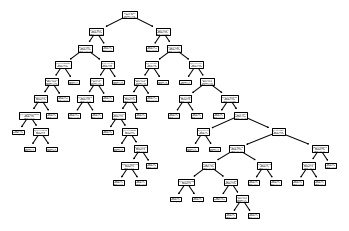

In [152]:
tree.plot_tree(TR)